In [1]:
import pandas as pd
df = pd.read_csv('../data/student_data.csv')
df

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,GP,F,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6
1,GP,F,no,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5
2,GP,F,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8
3,GP,F,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,15,14
4,GP,F,yes,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,yes,no,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9,9,9
391,MS,M,no,no,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15,14,16
392,MS,M,no,no,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8,10,8
393,MS,M,no,no,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11,11,12


# 1. 시각화 포함 탐색적 자료분석을 시행하시오

1. 범주형 변수 EDA
 - value_counts() -> bar plot
 - hue로 클래스 별 grade 분포 (box plot or kdeplot)
 - 
 
2. 연속형 변수 EDA
 - grade 히스토그램
 - grade를 y축에 놓고 전부 scatter plot 그리기
 - 상관 계수 시각화
 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      394 non-null    float64
 5   freetime    393 non-null    float64
 6   goout       392 non-null    float64
 7   Dalc        391 non-null    float64
 8   Walc        393 non-null    float64
 9   health      391 non-null    float64
 10  absences    392 non-null    float64
 11  grade       395 non-null    int64  
 12  G1          395 non-null    int64  
 13  G2          395 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 43.3+ KB


In [3]:
df.describe()

,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
count,394.000000,393.000000,392.000000,391.000000,393.000000,391.000000,392.000000,395.000000,395.000000,395.000000
mean,3.944162,3.239186,3.114796,1.470588,2.284987,3.562660,5.676020,10.660759,10.908861,10.713924
std,0.897794,0.994265,1.112397,0.873266,1.287778,1.386949,8.013393,3.719390,3.319195,3.761505
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000
25%,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,8.000000,9.000000
50%,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,13.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,19.000000


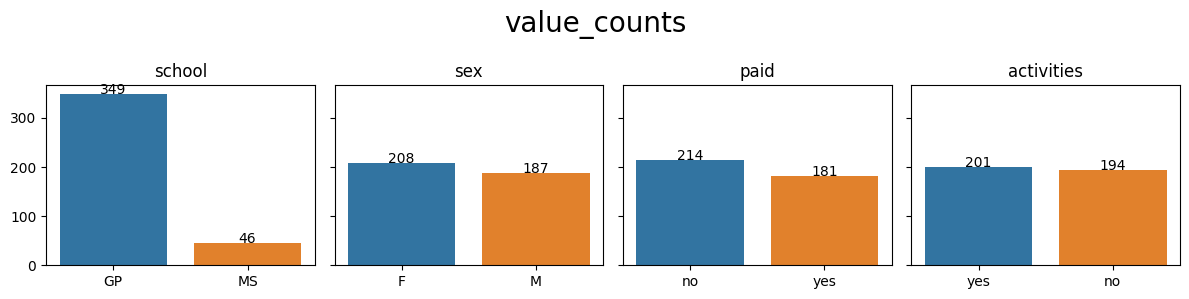

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

obj_df = df.select_dtypes('object')

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 3), sharey=True)

for idx, col in enumerate(obj_df.columns):
    val_cnt = obj_df[col].value_counts()
    sns.barplot(x=val_cnt.index, y = val_cnt.values, ax = axes[idx])
    axes[idx].set_title(col)

    axes[idx].text(axes[idx].get_xticks()[0], val_cnt.values[0], s=str(val_cnt.values[0]), ha='center')
    axes[idx].text(axes[idx].get_xticks()[1], val_cnt.values[1], s=str(val_cnt.values[1]), ha='center')
    

fig.suptitle('value_counts', fontsize=20)
fig.tight_layout()
plt.show()

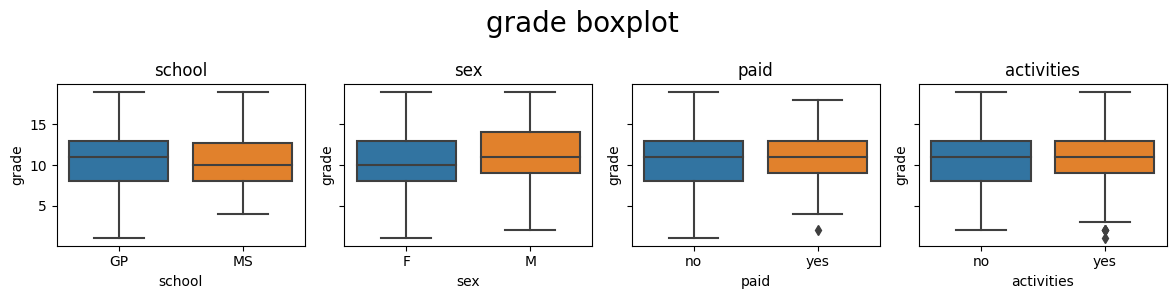

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 3), sharey=True)

for idx, col in enumerate(obj_df.columns):
    sns.boxplot(x=col, y = 'grade', data=df, ax = axes[idx])
    axes[idx].set_title(col)


fig.suptitle('grade boxplot', fontsize=20)
fig.tight_layout()
plt.show()

In [7]:
import numpy as np

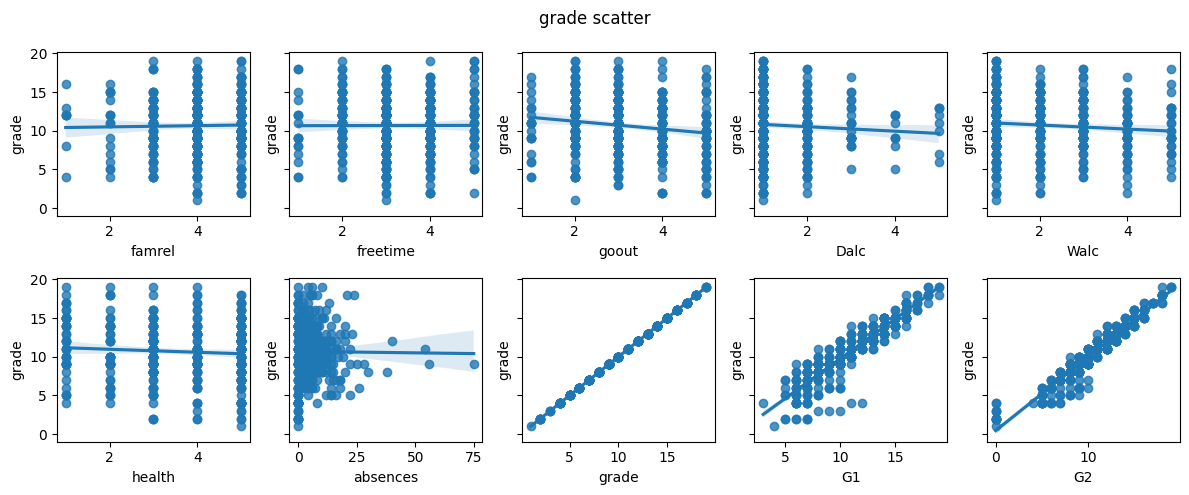

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

num_df = df.select_dtypes('number')

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 5), sharey=True)

for idx, col in enumerate(num_df.columns):
    sns.regplot(x=col, y='grade', data=num_df, ax = axes[idx//5][idx%5])

fig.suptitle('grade scatter')
fig.tight_layout()
plt.show()

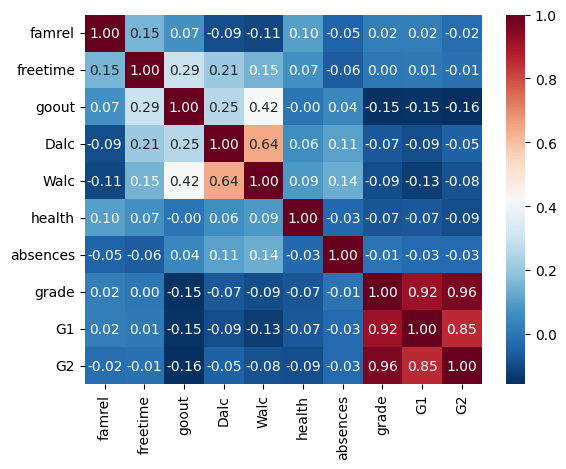

In [9]:
df_cor = df.corr()
df_cor

sns.heatmap(df_cor,
           cmap='RdBu_r',
           annot=True,
           fmt='.2f')
plt.show()

### -----------`

10.660759493670886


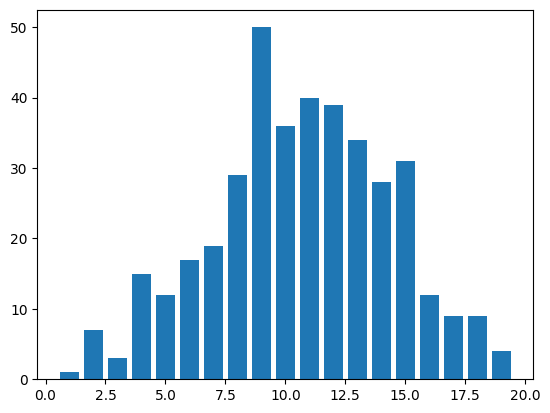

In [10]:
plt.bar(df['grade'].value_counts().index, df['grade'].value_counts().values)
print(np.mean(df['grade']))

In [11]:
import scipy.stats as stats
stats.shapiro(df['grade'])

ShapiroResult(statistic=0.9871256351470947, pvalue=0.0014306077500805259)

# 2.  결측치를 식별, 예측하는 두가지 방법을 쓰고, 이를 선택한 이유를 설명하시오

 - isna()
 - notna()
 

### 전체 결측치 확인

In [12]:
df.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        1
freetime      2
goout         3
Dalc          4
Walc          2
health        4
absences      3
grade         0
G1            0
G2            0
dtype: int64

### 결측치가 발생한 행 확인

In [13]:
df[df.isna().any(axis=1)]

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
9,GP,M,yes,yes,5.0,5.0,NaN,1.0,1.0,5.0,0.0,15,14,15
14,GP,M,no,no,NaN,5.0,2.0,1.0,1.0,3.0,0.0,15,14,16
15,GP,F,no,no,4.0,4.0,4.0,1.0,2.0,2.0,NaN,14,14,14
25,GP,F,yes,no,1.0,2.0,2.0,1.0,NaN,5.0,14.0,8,6,9
39,GP,F,yes,yes,4.0,3.0,1.0,1.0,1.0,NaN,8.0,13,14,13
40,GP,F,no,yes,3.0,3.0,NaN,1.0,2.0,3.0,25.0,9,7,10
49,GP,F,no,yes,4.0,4.0,4.0,1.0,1.0,NaN,2.0,7,7,7
61,GP,F,no,yes,5.0,5.0,5.0,NaN,5.0,5.0,6.0,10,10,8
71,GP,M,no,no,3.0,3.0,3.0,NaN,1.0,3.0,0.0,10,10,10
82,GP,F,yes,no,4.0,4.0,4.0,1.0,1.0,5.0,NaN,6,7,6


In [14]:
from sklearn.impute import KNNImputer

KNN_data = df.drop(columns=['school', 'sex', 'paid', 'activities'])

imputer = KNNImputer()
df_filled = imputer.fit_transform(KNN_data)
df_filled = pd.DataFrame(df_filled, columns = KNN_data.columns)
df[KNN_data.columns] = df_filled

df.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
grade         0
G1            0
G2            0
dtype: int64

# 3. 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용하시오. 이를 선택한 이유를 설명하시오 

 - 모델링 할 때 필요함
     - label encoder, one hot encoder -> 트리모델의 경우 상관없으나, 크고 작음을 학습할 수 있는 경우 label encoder는 X


In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [16]:
le = LabelEncoder()

In [17]:
pd.get_dummies(df)

,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2,school_GP,school_MS,sex_F,sex_M,paid_no,paid_yes,activities_no,activities_yes
0,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6.0,5.0,6.0,1,0,1,0,1,0,1,0
1,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,5.0,1,0,1,0,1,0,1,0
2,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8.0,7.0,8.0,1,0,1,0,0,1,1,0
3,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0,15.0,14.0,1,0,1,0,0,1,0,1
4,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9.0,6.0,10.0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9.0,9.0,9.0,0,1,0,1,0,1,1,0
391,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15.0,14.0,16.0,0,1,0,1,1,0,1,0
392,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8.0,10.0,8.0,0,1,0,1,1,0,1,0
393,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11.0,11.0,12.0,0,1,0,1,1,0,1,0


- OneHotEncoder를 사용한 이유 
    - LabelEncoder를 적용하는 경우 숫자의 크고 작음이 모델의 성능에 영향을 미칠 수 있다.

# 4. 데이터 분할 방법을 2가지 쓰고 적절한 데이터 분할을 적용하시오. 이를 선택한 이유를 설명하시오

- 첫번째 : K-Fold
- 두번째 : stratify K-Fold

# 5. svm, xgboost, randomforest 3개의 알고리즘 공통점을 쓰고 학생 성적 예측 분석에 적합한 알고리즘인지 설명하시오

- 셋다 회귀와 분류 둘다 사용 가능한 알고리즘이다.
- 연속형 변수인 성적을 예측하는 회귀분석에 적합하다

## 전처리 및 Train Test Split

In [18]:
train_df = pd.get_dummies(df)
train_df

,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2,school_GP,school_MS,sex_F,sex_M,paid_no,paid_yes,activities_no,activities_yes
0,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6.0,5.0,6.0,1,0,1,0,1,0,1,0
1,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,5.0,1,0,1,0,1,0,1,0
2,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8.0,7.0,8.0,1,0,1,0,0,1,1,0
3,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0,15.0,14.0,1,0,1,0,0,1,0,1
4,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9.0,6.0,10.0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9.0,9.0,9.0,0,1,0,1,0,1,1,0
391,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15.0,14.0,16.0,0,1,0,1,1,0,1,0
392,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8.0,10.0,8.0,0,1,0,1,1,0,1,0
393,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11.0,11.0,12.0,0,1,0,1,1,0,1,0


In [21]:
from sklearn.model_selection import train_test_split

X = train_df.drop('grade', axis=1)
y = train_df['grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## SVM
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10]}
]

grid_svm = GridSearchCV(SVR(), param_grid = param_grid, cv=5)
grid_svm.fit(X_train_scaled, y_train)

                                           

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10]}])

In [25]:
result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = pd.DataFrame(grid_svm.cv_results_['mean_test_score'])
result.sort_values(by='mean_test_score', ascending=False)

,C,gamma,mean_test_score
15,100.0,0.001,0.952590
11,10.0,0.010,0.948538
16,100.0,0.010,0.945073
10,10.0,0.001,0.933559
6,1.0,0.010,0.909491
12,10.0,0.100,0.823543
17,100.0,0.100,0.816363
7,1.0,0.100,0.727997
5,1.0,0.001,0.312597
1,0.1,0.010,0.232116


In [29]:
pred = grid_svm.predict(X_test_scaled)
mse = mean_squared_error(y_test, pred)

print('R2 : {:.3f}'.format(grid_svm.score(X_test_scaled, y_test)))
print('RMSE : {:.3f}'.format(np.sqrt(mse)))

R2 : 0.970
RMSE : 0.671


In [31]:
rf_grid = [
    {'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 4, 6, 8, 10]}
]
rf = RandomForestRegressor(n_estimators=100)
grid_rf = GridSearchCV(rf, param_grid=rf_grid, cv=5)
grid_rf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [2, 4, 6, 8, 10],
                          'min_samples_split': [2, 4, 6, 8, 10]}])

In [33]:
print(grid_rf.best_params_)
pred = grid_rf.predict(X_test_scaled)
mse = mean_squared_error(y_test, pred)

print('R2 :', grid_rf.score(X_test_scaled, y_test))
print("RMSE :", np.sqrt(mse))

{'max_depth': 8, 'min_samples_split': 8}
R2 : 0.9676504254580176
RMSE : 0.6941912716961023


In [34]:
xgb_grid = [
    {'max_depth': [2, 4, 6, 8, 10]}
]
xgb = GridSearchCV(XGBRegressor(n_estimators=1000), param_grid=xgb_grid)
xgb.fit(X_train_scaled, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    n

In [35]:
pred = xgb.predict(X_test_scaled)

mse = mean_squared_error(y_test, pred)

print('R2 :', xgb.score(X_test_scaled, y_test))
print("RMSE :", np.sqrt(mse))

R2 : 0.9663859292005338
RMSE : 0.7076286653563199


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

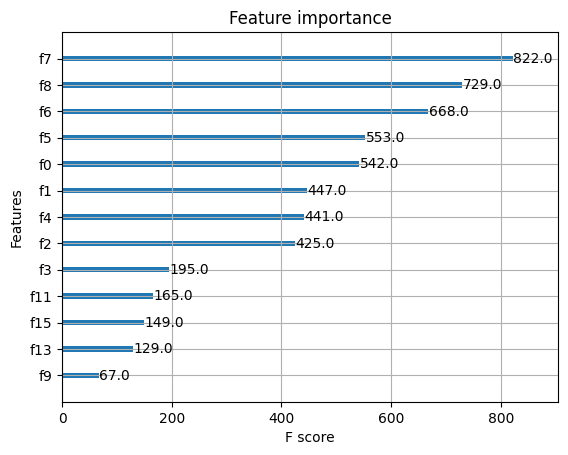

In [37]:
from xgboost import plot_importance

plot_importance(xgb.best_estimator_)

# 통계분석

In [39]:
import mglearn
X, y = mglearn.datasets.load_extended_boston()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [44]:
pred = lr.predict(X_test)
print('R2 :', lr.score(X_test, y_test))
print('RMSE :', np.sqrt(mean_squared_error(y_test, pred)))

R2 : 0.6158858584078746
RMSE : 5.592657237078645


In [45]:
alpha = np.arange(0, 1.1, 0.1)
ridge = Ridge(normalize=True)
param_grid = {'alpha': alpha}
ridge_model = GridSearchCV(ridge, param_grid=param_grid)
ridge_model.fit(X_train, y_train)


GridSearchCV(estimator=Ridge(normalize=True),
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [46]:
pred = ridge_model.predict(X_test)

print(ridge_model.best_params_)
print('ridge R2 :', ridge_model.score(X_test, y_test))
print('ridge RMSE :', np.sqrt(mean_squared_error(y_test, pred)))

{'alpha': 0.1}
ridge R2 : 0.7356090234954483
ridge RMSE : 4.6399293657141945


In [47]:
lasso = Lasso(normalize=True)
param_grid={'alpha': alpha}

lasso_model = GridSearchCV(lasso, param_grid=param_grid)
lasso_model.fit(X_train, y_train)


C:\Users\82103\anaconda3\envs\ADP\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\82103\anaconda3\envs\ADP\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\82103\anaconda3\envs\ADP\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 749.6117813682679, tolerance: 2.8377455294117646
  positive)
C:\Users\82103\anaconda3\envs\ADP\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, 

GridSearchCV(estimator=Lasso(normalize=True),
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [48]:
pred = lasso_model.predict(X_test)

print(lasso_model.best_params_)
print('Lasso R2 :', lasso_model.score(X_test, y_test))
print('RMSE :', np.sqrt(mean_squared_error(y_test, pred)))

{'alpha': 0.0}
Lasso R2 : 0.6901880385280026
RMSE : 5.022698918447136


## 다항 회귀분석 시각화

In [50]:
import pandas as pd
import numpy as np

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 3 * X ** 3 + X**2 + 2*X + 2 + np.random.randn(m, 1) 
line = np.linspace(-3, 3, 100, endpoint=False).reshape(-1, 1)

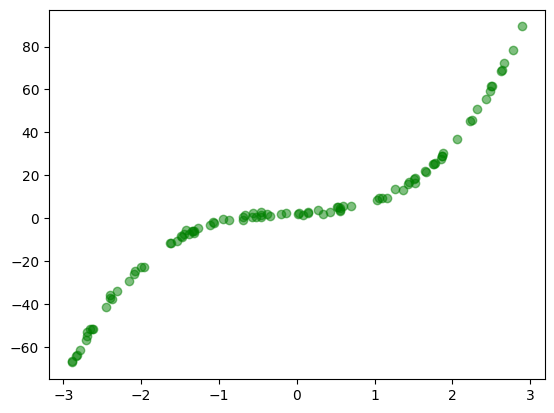

In [51]:
plt.plot(X, y, 'o', c='g', alpha=0.5)

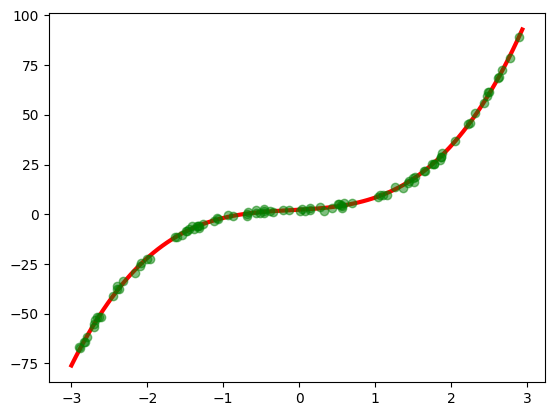

In [54]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
line_poly = poly.transform(line)
reg = LinearRegression().fit(X_poly, y)

plt.plot(line, reg.predict(line_poly), c='r', linewidth=3)
plt.plot(X, y, 'o', c='g', alpha=0.5)

In [58]:
avocado = pd.read_csv('../data/avocado.csv', index_col=0)
avocado = avocado[['AveragePrice', 'type', 'region']]
avocado = avocado[(avocado['region']=='Orlando') | 
                 (avocado['region'] == 'Boston') |
                 (avocado['region'] == 'Chicago')].reset_index(drop=True)

avocado

,AveragePrice,type,region
0,1.13,conventional,Boston
1,1.07,conventional,Boston
2,1.01,conventional,Boston
3,1.02,conventional,Boston
4,1.19,conventional,Boston
...,...,...,...
1009,1.36,organic,Orlando
1010,1.67,organic,Orlando
1011,1.53,organic,Orlando
1012,1.55,organic,Orlando


In [60]:
AveragePrice = avocado['AveragePrice']
avocado_type = avocado['type']
region = avocado['region']

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = 'AveragePrice ~ C(avocado_type) * C(region)'
model = ols(formula, avocado).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(avocado_type),56.111007,1.0,828.218296,1.989417e-133
C(region),0.432136,2.0,3.189242,4.161918e-02
C(avocado_type):C(region),1.878817,2.0,13.866003,1.146622e-06
Residual,68.291047,1008.0,NaN,NaN


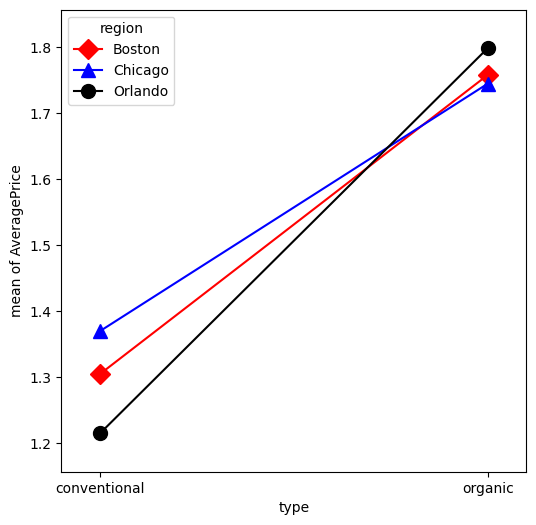

In [62]:
from statsmodels.graphics.factorplots import interaction_plot

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(avocado_type, region, AveragePrice,
                      colors = ['red', 'blue', 'black'], markers=['D', '^', 'o'],
                      ms=10, ax=ax)